# Método Numérico de Numerov

* PET - Física UFRN
* Petiano: José Arthur de Luna Oliveira
* Data:

$\quad$ Nesse `Notebook` exploraremos o método numérico de Numerov, tal método é utilizado para resolver equações diferenciais de segunda ordem. Aqui neste `Notebook` desenvolveremos todo o método e o usaremos para solucionar o problema do átomo de hidrogênio. Vale salientar que este trabalho é baseado nas referências _Applications of the Numerov method to simple quantum systems using Python_ **[1]** e _Investigação da energia de ligação entre átomos utilizando o potencial de Lennard-Jones_ **[2]**.

Neste `Notebook` haverá as seguintes seções:
* Introdução;
* Problema do Átomo de Hidrogênio;
* Solucionando o problema;
* Conclusão.

## Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ticks(): #essa é uma função que mexe na aparência dos gráficos
    plt.figure(figsize = (8,5))
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', top = True, right = True, direction = 'in', length=5, width=1)
    plt.tick_params(axis='y', which='both', top = True, right = True, direction = 'in', length=5, width=1)

## Detalhes da Biblioteca

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.11.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
Matplotlib 3.8.0
Numpy 1.26.4
Thu Apr 25 00:53:01 2024 Hora Padrão de Buenos Aires

## 1. Introdução

$\quad$ Antes de iniciarmos, vale ressaltar que essa seção é toda baseada na construção que método do artigo *Applications of the Numerov method to simple quantum systems using Python* **[2]**.

$\quad$ O principal motivo para Numerov desenvolver esse método foi que ele queria determinar as correções na trajetória do cometa Halley. Esse método, por sua vez, surgiu inicialmente para solucionar problemas de autovalores relacionados a equações diferenciais ordinárias de segunda ordem para corpos celestes. Tais equações não possuem informação da primeira derivada de uma função desconhecida, $y(x)$, em outras palavras, equações com a seguinte forma

$$ \frac{d^2y}{dx^2} = f(x, \ y) \ . \tag{1.1}$$

$\quad$ Nos métodos mais tradicionais para equações diferenciais, por exemplo, método de Euler ou o Runge-Kutta, cria-se um sistema de equações para resolvê-la como,

$$  {\begin{cases}
        z = \frac{dy}{dx}\\
        \\
        \frac{dz}{dx} = f(x, \ y)
        \end{cases}
        } \ .$$

$\quad$ No entanto, em problemas que $\frac{dy}{dx}$ são desconhecidos, não pode utilizar esses métodos tradicionais para solucionar esses problemas, então deve-se usar outros métodos.

$\quad$ Para desenvolver o método que usaremos neste `Notebook`, usaremos o problema de estados ligados da Mecânica Quântica. Suponha que uma partícula de massa $m$, confinada em um potencial $V(x)$, em um dado intervalo $a<x<b$, onde as energias permitidas ($E$) e as funções de ondas correspondentes $\psi(x)$ que descrevem esses estados estacionários satisfazem a equação de autovalor de Schrödinger

$$ \frac{d^2\psi(x)}{dx^2} + k^2(x)\psi(x) = 0 \ ,\tag{1.2}$$

na qual $k=\sqrt{2m[E - V(x)]}/\hbar$ e $\hbar = 1.055\times 10^{-34}\ J.s $ é a constante de Planck reduzida. Nesse caso, podemos estabelecer condições de continuidade para os valores $\psi$ e $d\psi/dx$ em dois ou mais pontos do domínio da função de onda. Assim, tornando desnecessária a transformação de uma equação diferencial de segunda ordem em um sistema de primeira ordem. Vale ressaltar que o método de Numerov nos permite a determinação simultânea do espectro de energia da partícula e das autofunções associadas a cada valor de energia.

### 1.2 Encontrando a Fórmula de Numerov

$\quad$ O método numérico de Numerov é um método interativo, assim a solução deve ser conhecida em dois pontos subsequentes no intervalo $[a, \ b]$, ou seja, $\psi(x - \delta)$ e $\psi(x)$ devem ser conhecidos, de forma que $\delta$ é um valor muito pequeno, e será o passo de integração do nosso algoritmo.

$\quad$ Para construir o nosso algoritmo, começaremos expandindo em série de Taylor o $\psi(x \pm \delta)$ até a quarta ordem,

$$ \psi(x \pm \delta) = \psi(x) \pm \delta \psi^{(1)}(x) + \frac{\delta^2}{2}\psi^{(2)}(x) \pm \frac{\delta^3}{6}\psi^{(3)}(x) + \frac{\delta^4}{24}\psi^{(4)}(x) \ , \tag{1.3}$$

somando os termos $\psi(x + \delta)$ e $\psi(x-\delta)$, temos

$$ \psi(x+\delta) + \psi(x-\delta) = \psi(x) + \delta \psi^{(1)}(x) + \frac{\delta^2}{2}\psi^{(2)}(x) + \frac{\delta^3}{6}\psi^{(3)}(x) + \frac{\delta^4}{24}\psi^{(4)}(x) + \psi(x) - \delta \psi^{(1)}(x) + \frac{\delta^2}{2}\psi^{(2)}(x) - \frac{\delta^3}{6}\psi^{(3)}(x) + \frac{\delta^4}{24}\psi^{(4)}(x)$$

$$ \implies \psi(x+\delta) + \psi(x-\delta) = 2\psi(x) + \delta^2\psi^{(2)}(x)+ \frac{\delta^4}{12}\psi^{(4)}(x)  \implies \psi(x+\delta) + \psi(x-\delta) - 2\psi(x) = \delta^2\psi^{(2)}(x)+ \frac{\delta^4}{12}\psi^{(4)}(x)$$

$$ \therefore \boxed{ \frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2} = \left(1 + \frac{\delta^2}{12}\frac{d^2}{dx^2} \right)\psi^{(2)}(x)} \ .\tag{1.4}$$

$\quad$ Escrevendo a Equação **(1.2)** da seguinte forma, $\frac{d^2\psi(x)}{dx^2} = - k^2(x)\psi(x)$, podemos substituir isso na Equação **(1.4)**, assim

$$ \frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2} = \left(1 + \frac{\delta^2}{12}\frac{d^2}{dx^2} \right)\left[-k^2(x)\psi(x)\right]$$

$$ \implies \frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2} = -k^2(x)\psi(x) - \frac{\delta^2}{12}\frac{d^2}{dx^2}\left[k^2(x)\psi(x)\right]\ , \tag{1.5}$$

agora faremos a seguinte manipulação na Equação **(1.4)**,

$$ \frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2} = \psi^{(2)}(x)+ \frac{\delta^2}{12}\psi^{(4)}(x)$$

$$\implies \psi^{(2)}(x) = \frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2} - \frac{\delta^2}{12}\psi^{(4)}(x) , $$

vamos fazer a seguinte troca $\psi(x) \rightarrow k^2(x)\psi(x)$, então

$$ \frac{d^2}{dx^2}[k^2(x)\psi(x)] = \frac{k^2(x+\delta)\psi(x+\delta) + k^2(x-\delta)\psi(x-\delta) - 2k^2(x)\psi(x)}{\delta^2} - \frac{\delta^2}{12}[k^2(x)\psi(x)]^{(4)} \ ,$$

substituindo esse resultado na Equação **(1.5)**, temos

$$\frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2} =-k^2(x)\psi(x) - \frac{\delta^2}{12}\left[\frac{k^2(x+\delta)\psi(x+\delta) + k^2(x-\delta)\psi(x-\delta) - 2k^2(x)\psi(x)}{\delta^2}\right] - \frac{\delta^4}{144}[k^2(x)\psi(x)]^{(4)} \ ,$$

considerando que $\mathcal{O(\delta^4)} = - \frac{\delta^4}{144}[k^2(x)\psi(x)]^{(4)}$, então

$$\frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2} =-k^2(x)\psi(x) - \frac{\delta^2}{12}\left[\frac{k^2(x+\delta)\psi(x+\delta) + k^2(x-\delta)\psi(x-\delta) - 2k^2(x)\psi(x)}{\delta^2}\right] + \mathcal{O(\delta^4)}$$

$$\implies \psi(x+\delta) + \psi(x-\delta) - 2\psi(x) =-\delta^2 k^2(x)\psi(x) - \frac{\delta^2}{12}\left[k^2(x+\delta)\psi(x+\delta) + k^2(x-\delta)\psi(x-\delta) - 2k^2(x)\psi(x)\right] + \mathcal{O(\delta^4)}$$

$$\implies \psi(x+\delta) + \frac{\delta^2}{12}k^2(x+\delta)\psi(x+\delta) = 2\psi(x) -\delta^2 k^2(x)\psi(x) + \frac{\delta^2}{12}2k^2(x)\psi(x) -\psi(x-\delta) - \frac{\delta^2}{12} k^2(x-\delta)\psi(x-\delta) + \mathcal{O(\delta^4)}$$

$$\implies \left[1 + \frac{\delta^2}{12}k^2(x+\delta)\right]\psi(x+\delta) = \left[2  + \frac{\delta^2k^2(x) -6\delta^2 k^2(x)}{6}\right]\psi(x) -\left[1 + \frac{\delta^2}{12} k^2(x-\delta)\right]\psi(x-\delta) + \mathcal{O(\delta^4)}$$

$$\implies \left[1 + \frac{\delta^2}{12}k^2(x+\delta)\right]\psi(x+\delta) = 2\left[1  - \frac{5\delta^2}{12} k^2(x)\right]\psi(x) -\left[1 + \frac{\delta^2}{12} k^2(x-\delta)\right]\psi(x-\delta) + \mathcal{O(\delta^4)} \ ,$$

consideraremos $\mathcal{O(\delta^4)} \approx 0$, assim

$$\left[1 + \frac{\delta^2}{12}k^2(x+\delta)\right]\psi(x+\delta) = 2\left[1  - \frac{5\delta^2}{12} k^2(x)\right]\psi(x) -\left[1 + \frac{\delta^2}{12} k^2(x-\delta)\right]\psi(x-\delta)$$

$$\therefore \ \boxed{\psi(x+\delta) = \frac{2\left[1  - \frac{5\delta^2}{12} k^2(x)\right]\psi(x) -\left[1 + \frac{\delta^2}{12} k^2(x-\delta)\right]\psi(x-\delta)}{\left[1 + \frac{\delta^2}{12}k^2(x+\delta)\right]}} \ . \tag{1.6}$$

$\quad$ Nosso objetivo é resolver uma equação de autovalor, a técnica de integração numérica da equação de Schrödinger unidimensional para uma partícula em um poço, precisará de um chute inicial para os autovalores (a energia $E$) e os dois pontos respectivos das autofunções. Para a escolha do valor arbitrário da energia $E$, devemos lembrar da relação de incerteza de Heisenberg, que diz que a energia $E$ de uma partícula em um poço de potencial $V(x)$ deve ser maior que o valor mínimo do poço, ou seja, $E_{initial} = V_{min} + \Delta E$, em que $\Delta E > 0$.

$\quad$ A escolha desse valor determinará os pontos do retorno da partícula, que para encontrá-los basta igualar o valor arbitrário $E$ e o potencial $V(x)$. Fazendo isso, encontrará dois pontos de retorno da partícula $x_r$ e $x_l$. Na Mecânica Clássica, a região $[x_r, \ x_l]$ será a única região onde a partícula poderá ficar. Em outras palavras, a partícula é restrita a se manter nessa região, enquanto as regiões além desses pontos ($x<x_r$ e $x>x_l$ ) são chamadas na mecânica clássica de regiões proibidas.

$\quad$  No entanto, na Mecânica Quântica é possível da partícula se encontrar além dos pontos de retorno, ou seja, a equação Schrödinger possui solução nessas regiões. Assim, cada valor de energia possui uma autofunção associada, as quais terão solução na região proibida, no entanto, ela tenderá a zero.
Dessa forma, esses pontos, onde a autofunção se anula, são os pontos de contorno $a$ e $b$, onde $b>a$, do domínio de integração.

$\quad$ O método de Numerov requer um esquema de interação usando a Equação **(1.6)**, que a partir do ponto $a$ para a direita, criará uma função que até um ponto ($x_{match}$), e do ponto $b$ para a esquerda, criará outra função até esse mesmo ponto. Sendo assim, teremos duas funções, $\psi^{\ l}(x)$ e $\psi^{\ r}(x)$, a primeira virá da esquerda e a outra da direita, a partir dos pontos $a$ e $b$, respectivamente.

### 1.3 Construindo o Algoritmo

$\quad$ Diante do que foi dito, devemos escolher um valor inicial para $E$, obter duas soluções, uma pela esquerda, $\psi^{\ l}(x)$ e uma pela direita, $\psi^{\ l}(x)$, nas quais devemos começar com os dois pontos consecutivos iniciais e aplicar na Equação **(1.6)** para obter o resto da solução. Em seguida, explicitaremos o que deve ser feito.

#### Solução pela esquerda ($x < x_{match}$)

$\quad$ Dado o chute inicial para energia, assim podemos escolher o $x_{match}$, que será o ponto de encontro das duas soluções, o qual deve está no intervalo de integração $[a, \ b]$. Em seguida, devemos definir os dois pontos iniciais consecutivos da solução $\psi^{\ l}(x)$ como:

$$  {\begin{cases}
        \psi^{\ l}(a) = 0\\
        \\
        \psi^{\ l}(a+\delta) = \delta^{\ l}, \ (\delta^{\ l} \ll 1)
        \end{cases}
        } \ ,$$

as quais, o $\delta$ é o passo de integração e $\delta^l$ é um valor muito pequeno. Note que igualamos o $\psi^l(a+\delta)$ a um valor muito pequeno, pois como estamos dividindo a função em intervalos muito pequenos ($\delta$), o próximo ponto consecutivo de zero ($\psi^l=0$) será um número muito próximo de zero. 

$\quad$ Definidos esses pontos iniciais, basta aplicar a Equação **(1.6)**, que obtém cada ponto da solução sequencialmente até $x_{match}$.

#### Solução pela Direita ($x>x_{match}$)

$\quad$ Análogo ao processo explicado anteriormente, com o mesmo valor de energia e o mesmo $x_{match}$, definimos os dois pontos iniciais consecutivos da solução $\psi^{\ r}(x)$ como

$$  {\begin{cases}
        \psi^{\ r}(b) = 0\\
        \\
        \psi^{\ r}(b-\delta) = \delta^{\ r}, \ (\delta^{\ r} \ll 1)
        \end{cases}
        } \ .$$

$\quad$ Dessa forma, aplicando a Equação **(1.6)** obtêm a solução $\psi^{\ r}(x)$ até $x_{match}$.

$\quad$ Note que a construção das duas soluções termina em $x_{match}$ e nesse ponto estas devem ser iguais nesse ponto, garantindo a continuidade da solução,

$$\psi^{\ l}(x_{match}) = \psi^{\ r}(x_{match}) \ ,\tag{1.7}$$

no entanto nem sempre as soluções possíveis atendem a essa condição, então, para garantir a continuidade da solução, redefiniremos o $\psi^{\ l}$ da seguinte forma,

$$ \psi^{\ l}(x) \rightarrow \psi^{\ l}(x)\frac{\psi^{\ r}(x_{match})}{\psi^{\ l}(x_{match})} \ ,\tag{1.8}$$

na qual $a \leq x \leq x_{match}$.

$\quad$ Feito isso, deve verificar se as derivadas primeiras das soluções são tão próximas quanto queremos, no ponto $x_{match}$, ou seja, a diferença entre essas duas derivadas deve ser menor que $\epsilon$, esse valor nós escolhemos. Dessa forma, deve determinar a derivada das soluções no ponto $x_{match}$ numericamente e verificar se o módulo da diferença é menor que o erro que escolhemos. Para calcular as derivadas numericamente, basta aplicar as seguintes equações:

$$  {\begin{cases}
        \frac{d\psi^{\ l}}{dx}\vert_{x_{match}} = \frac{\psi^{\ l}(x_{match} + \delta) - \psi^{\ l}(x_{match} - \delta)}{2\delta}\\
        \\
        \frac{d\psi^{\ r}}{dx}\vert_{x_{match}} = \frac{\psi^{\ r}(x_{match} + \delta) - \psi^{\ r}(x_{match} - \delta)}{2\delta}
        \end{cases}
        } \ . \tag{1.9}$$

$\quad$ Caso a diferença entre as derivadas for menor que o erro escolhido, então encontramos o nosso autovalor e a respectiva autofunção. Porém, se a condição de continuidade não for atendida, então devemos aumentar o valor da energia e recomeçar todo o processo novamente. Isso deve ser feito até encontrar os autovalores e as autofunções. Vale ressaltar que esse procedimento pode ser repetido até o número desejado de autovalores e autofunções do problema. Devido ao método ser baseado na expansão de série Taylor até a quarta ordem, e por isso seu erro é muito pequeno comparado a outros métodos baseados em expansão de ordem inferior.

### 1.4 Resumindo o Método de Numerov

$\quad$ Aqui nessa seção resumiremos tudo o que foi dito sobre método numérico de Numerov em passos para poder aplicá-lo:

* 1ª Passo: Se deve dar um chute inicial para o valor da energia $E$ e os pontos consecutivos de cada solução, como foi definido anteriormente.
* 2ª Passo: Com o valor inicial da energia, devemos o escolher o $x_{match}$.
* 3ª Passo: Com a Equação **(1.6)** deve-se determinar as soluções $\psi^{\ l}(x)$ e $\psi^{\ r}(x)$, a partir dos pontos consecutivos até $x_{match}$.
* 4ª Passo: Verificar a condição de continuidade ($\frac{d\psi^{\ l}}{dx}\vert_{x_{match}} = \frac{d\psi^{\ r}}{dx}\vert_{x_{match}}$), ou seja, verificar se a diferença das derivadas de primeira ordem de $\psi^{\ l}(x)$ e $\psi^{\ r}(x)$ atingi a precisão que queremos. Caso não seja satisfeita, então devemos aumentar o valor da energia e voltarmos ao primeiro passo.
* 5ª Passo: Se o quarto passo for satisfeito, então encontramos um autovalor e sua respectiva autofunção. Assim, caso queiramos, podemos ir atrás dos outros autoestados do problema. Além disso, a quantidade de vezes que a autofunção passa pelo zero indica em qual nível está pertence o autoestado encontrado.

## 2. Problema do Átomo de Hidrogênio

$\quad$ Agora, após descrito todo o método numérico de Numerov, agora podemos aplicá-lo em algum problema. O primeiro problema que solucionaremos com este método é o problema do Átomo de Hidrogênio. Para este problema, consideraremos uma partícula de massa $m$ sobre a ação de um campo elétrico coulombiano, como o elétron no átomo de hidrogênio. Então, a equação radial de Schrödinger para este caso é

$$ \frac{d^2 R(r)}{dr^2} + \frac{2}{r} \frac{dR(r)}{dr} + \frac{2m}{\hbar^2} \left[E + \frac{e^2}{r} - \frac{\hbar^2}{2m} \frac{l(l+1)}{r^2} \right] R(r) = 0 \ .\tag{2.1} $$

$\quad$ A seguir faremos as seguintes substituições, $r=x a_B$, em que $a_B = \frac{\hbar^2}{me^2}$ é o raio de Bohr, e também $\psi(x) = R(r)$. Conseguinte a Equação **(2.1)** pode ser reescrita como

$$\frac{1}{a_B^2}\frac{d^2 \psi(x)}{dx^2} + \frac{2}{xa_B} \frac{1}{a_B}\frac{d\psi(x)}{dx} + \frac{2}{e^2a_B} \left[E + \frac{e^2}{xa_B} - \frac{e^2a_B}{2} \frac{l(l+1)}{x^2a_B^2} \right] \psi(x) = 0$$

$$ \implies \frac{1}{a_B^2}\left\{ \frac{d^2 \psi(x)}{dx^2} + \frac{2}{x}\frac{d\psi(x)}{dx} +  \frac{2}{e^2a_B}\left[Ea_B^2 + \frac{e^2a_B}{x} - \frac{e^2a_B}{2} \frac{l(l+1)}{x^2} \right] \psi(x) \right\}= 0 $$

$$ \implies \frac{d^2 \psi(x)}{dx^2} + \frac{2}{x}\frac{d\psi(x)}{dx} +  \frac{2}{e^2a_B}\left[Ea_B^2 + \frac{e^2a_B}{x} - \frac{e^2a_B}{2}\frac{l(l+1)}{x^2} \right] \psi(x)= 0$$

$$ \implies \frac{d^2\psi(x)}{dx^2} + \frac{2}{x}\frac{d\psi(x)}{dx} +  \left[\frac{2a_B}{e^2}E + \frac{2}{x} - \frac{l(l+1)}{x^2} \right]\psi(x)= 0 \ ,$$

faremos as seguintes substituições $\epsilon = \frac{2a_B}{e^2}E$ e $V(x) = \frac{l(l+1)}{x^2} - \frac{2}{x}$, são, respectivamente, a energia e o potencial efetivo em unidade atômicas, então

$$ \frac{d^2\psi(x)}{dx^2} = - \frac{2}{x}\frac{d\psi(x)}{dx} - \left[\epsilon - V(x)\right] \psi(x) \tag{2.2}$$

### 2.2 Encontrando a Equação de Recorrência

$\quad$ Note que essa equação diferencial possui um termo de derivada de primeira ordem, mesmo que o método de Numerov tenha sido feito para solucionar equações diferenciais sem a informação dessa deriva, podemos solucionar esse tio de equação diferencial. No entanto, primeiramente teremos que encontrar a relação de recorrência para esse problema, e depois aplicarmos o método. Para isso, expressaremos a Equação **(2.2)** da seguinte forma

$$ \frac{d^2\psi(x)}{dx^2} = -p(x)\frac{d\psi(x)}{dx} - s(x) \psi(x) \ ,\tag{2.3}$$

em que $p(x) = \frac{2}{x}$ e $s(x) = \epsilon - V(x)$. Agora multiplicaremos as Equação **(2.3)** pelo termo $\left(1 + \frac{\delta^2}{12}\frac{d^2}{dx^2} \right)$, assim

$$\left(1 + \frac{\delta^2}{12}\frac{d^2}{dx^2} \right)\frac{d^2\psi(x)}{dx^2} =\left(1 + \frac{\delta^2}{12}\frac{d^2}{dx^2} \right)\left[ -p(x)\frac{d\psi(x)}{dx} - s(x) \psi(x) \right]$$

$$\implies \left(1 + \frac{\delta^2}{12}\frac{d^2}{dx^2} \right)\frac{d^2\psi(x)}{dx^2} = -p(x)\frac{d\psi(x)}{dx} - s(x) \psi(x) - \frac{\delta^2}
{12}\frac{d^2}{dx^2}\left[p(x)\frac{d\psi(x)}{dx} + s(x) \psi(x) \right] \ . \tag{2.4}$$

$\quad$ Na Equação **(1.4)** podemos fazer a seguinte troca $\psi(x) \rightarrow p(x)\frac{d\psi(x)}{dx} + s(x) \psi(x)$, assim podemos reescreve-la da seguinte forma,

$$\frac{d^2}{dx^2}\left[p(x)\frac{d\psi(x)}{dx} + s(x) \psi(x) \right]  = \frac{1}{\delta^2}\left[p(x+\delta)\frac{d\psi(x+\delta)}{dx} + s(x+\delta) \psi(x+\delta) + p(x-\delta)\frac{d\psi(x-\delta)}{dx} + s(x-\delta) \psi(x-\delta) - 2p(x)\frac{d\psi(x)}{dx} - 2s(x) \psi(x)\right] - \frac{\delta^2}{12}\psi^{(4)}(x) \ ,$$

substituindo as derivadas de primeira ordem com suas respectivas aproximações **[3,4]**,

$$  {\begin{cases}
        \frac{d\psi(x)}{dx} = \frac{\psi(x+\delta) - \psi(x-\delta)}{2\delta}\\
        \\
        \frac{d\psi(x+\delta)}{dx} = \frac{\psi(x+\delta) - \psi(x)}{\delta}\\
        \\
        \frac{d\psi(x-\delta)}{dx} = \frac{\psi(x) - \psi(x-\delta)}{\delta}\\
        \end{cases}
        } \ .$$

Assim teremos que,

$$\frac{d^2}{dx^2}\left[p(x)\frac{d\psi(x)}{dx} + s(x) \psi(x) \right]  = \frac{1}{\delta^2}\left\{p(x+\delta)\left[\frac{\psi(x+\delta) - \psi(x)}{\delta}\right] + s(x+\delta) \psi(x+\delta)\right\} +$$

$$ + \frac{1}{\delta^2}\left\{p(x-\delta)\left[\frac{\psi(x) - \psi(x-\delta)}{\delta}\right] + s(x-\delta) \psi(x-\delta)\right\} - \frac{1}{\delta^2}\left\{2p(x)\left[\frac{\psi(x+\delta) - \psi(x-\delta)}{2\delta} \right]+ 2s(x) \psi(x)\right\} - \frac{\delta^2}{12}\psi^{(4)}(x)$$

$$\implies \frac{d^2}{dx^2}\left[p(x)\frac{d\psi(x)}{dx} + s(x) \psi(x) \right]  = \frac{1}{\delta^2}\left[p(x+\delta)\frac{\psi(x+\delta)}{\delta} - p(x+\delta)\frac{\psi(x)}{\delta} + s(x+\delta) \psi(x+\delta)\right] +$$

$$ + \frac{1}{\delta^2}\left[p(x-\delta)\frac{\psi(x)}{\delta} - p(x-\delta)\frac{\psi(x-\delta)}{\delta} + s(x-\delta) \psi(x-\delta)\right] - \frac{1}{\delta^2}\left[p(x)\frac{\psi(x+\delta)}{\delta} - p(x)\frac{\psi(x-\delta)}{\delta}+ 2s(x) \psi(x)\right] - \frac{\delta^2}{12}\psi^{(4)}(x) \, $$

aplicando a regra do produto notável, temos

$$\frac{d^2}{dx^2}\left[p(x)\frac{d\psi(x)}{dx} + s(x) \psi(x) \right]  = \frac{1}{\delta^2}\left\{\left[\frac{p(x+\delta) - p(x)}{\delta} + s(x+\delta)\right]\psi(x+\delta) + \left[ \frac{p(x) - p(x-\delta)}{\delta} + s(x-\delta)\right]\psi(x-\delta)\right\} + $$

$$- \frac{2}{\delta^2}\left[\frac{p(x+\delta) - p(x-\delta)}{2\delta}+ s(x)\right]\psi(x) - \frac{\delta^2}{12}\psi^{(4)}(x) \ .$$

$\quad$ Note que, podemos fazer as seguintes substituições **[3,4]**,

$$  {\begin{cases}
        \frac{p(x+\delta) - p(x-\delta)}{2\delta} = \frac{dp(x)}{dx}\\
        \\
        \frac{p(x+\delta) - p(x)}{\delta} = \frac{dp(x)}{dx}\\
        \\
        \frac{p(x) - p(x-\delta)}{\delta} = \frac{dp(x)}{dx}\\
        \end{cases}
        } \ .$$

$\quad$ Assim,

$$\frac{d^2}{dx^2}\left[p(x)\frac{d\psi(x)}{dx} + s(x) \psi(x) \right]  = \frac{1}{\delta^2}\left\{\left[\frac{dp(x)}{dx} + s(x+\delta)\right]\psi(x+\delta) + \left[\frac{dp(x-\delta)}{dx} + s(x-\delta)\right]\psi(x-\delta) - 2\left[\frac{dp(x)}{dx}+ s(x)\right]\psi(x)\right\} - \frac{\delta^2}{12}\psi^{(4)}(x) \ . \tag{2.5}$$

$\quad$ Agora, substituiremos as Equações **(1.4)** e **(2.5)** na Equação **(2.4)**, além disso, o termo que é derivada primeira de $\psi(x)$ vamos por na forma numérica. Logo,

$$\frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2}= -p(x)\left[\frac{\psi(x+\delta) - \psi(x-\delta)}{2\delta}\right] - s(x) \psi(x) -\frac{\delta^2}{12}\frac{1}{\delta^2}\left[\frac{dp(x)}{dx} + s(x+\delta)\right]\psi(x+\delta) \ + $$

$$- \ \frac{\delta^2}{12}\frac{1}{\delta^2}\left\{\left[\frac{dp(x)}{dx} + s(x-\delta)\right]\psi(x-\delta) - 2\left[\frac{dp(x)}{dx}+ s(x)\right]\psi(x)\right\} - \frac{\delta^2}{12}\frac{\delta^2}{12}\psi^{(4)}(x)$$

$$\implies \frac{\psi(x+\delta) + \psi(x-\delta) - 2\psi(x)}{\delta^2}= -p(x)\left[\frac{\psi(x+\delta) - \psi(x-\delta)}{2\delta}\right] - s(x) \psi(x) - \frac{1}{12}\left[\frac{dp(x)}{dx} + s(x+\delta)\right]\psi(x+\delta) \ +$$

$$- \ \frac{1}{12}\left[\frac{dp(x)}{dx} + s(x-\delta)\right]\psi(x-\delta) + \frac{1}{6}\left[\frac{dp(x)}{dx}+ s(x)\right]\psi(x)- \frac{\delta^4}{144}\psi^{(4)}(x) \ .$$

$\quad$ Observe que $\frac{\delta^4}{144}\psi^{(4)}(x) = \mathcal{O(\delta^4)} $, que como foi feito na seção anterior, consideraremos este termo nulo. Então, agora isolaremos o termo $\psi(x+\delta)$, feito finalmente teremos a relação de recorrência,

$$\frac{\psi(x+\delta)}{\delta^2} + p(x)\frac{\psi(x+\delta)}{2\delta} + \frac{1}{12}\left[\frac{dp(x)}{dx} + s(x+\delta)\right]\psi(x+\delta)= \frac{2\psi(x)}{\delta^2} - s(x) \psi(x)  + \frac{1}{6}\left[\frac{dp(x)}{dx}+ s(x)\right]\psi(x) $$

$$ + p(x)\frac{\psi(x-\delta)}{2\delta} -\frac{\psi(x-\delta)}{\delta^2}- \frac{1}{12}\left[\frac{dp(x)}{dx} + s(x-\delta)\right]\psi(x-\delta) $$

$$\implies \psi(x+\delta) \left\{1 +p(x)\frac{\delta}{2} + \frac{\delta^2}{12}\left[\frac{dp(x)}{dx} + s(x+\delta)\right]\right\}= \left\{2 - \delta^2 s(x) + \frac{\delta^2}{6}\left[\frac{dp(x)}{dx}+ s(x)\right]\right\}\psi(x) + \left\{p(x)\frac{\delta}{2} -1-\frac{\delta^2}{12}\left[\frac{dp(x)}{dx} + s(x-\delta)\right]\right\}\psi(x-\delta)$$

$$\implies \psi(x+\delta) \left\{1 +p(x)\frac{\delta}{2} + \frac{\delta^2}{12}\left[\frac{dp(x)}{dx} + s(x+\delta)\right]\right\}= \left[2 + \frac{\delta^2}{6}\frac{dp(x)}{dx}- \frac{5\delta^2}{6}s(x)\right]\psi(x) - \left\{ 1 -p(x)\frac{\delta}{2} +\frac{\delta^2}{12}\left[\frac{dp(x)}{dx} + s(x-\delta)\right]\right\}\psi(x-\delta)$$

$$\therefore \boxed{\psi(x+\delta) = \frac{2\left\{1 + \frac{5\delta^2}{12}\left[\frac{1}{5}\frac{dp(x)}{dx}- s(x)\right]\right\}\psi(x) - \left\{ 1 -p(x)\frac{\delta}{2} +\frac{\delta^2}{12}\left[\frac{dp(x)}{dx} + s(x-\delta)\right]\right\}\psi(x-\delta)}{\left\{1 +p(x)\frac{\delta}{2} + \frac{\delta^2}{12}\left[\frac{dp(x)}{dx} + s(x+\delta)\right]\right\}}} \ .\tag{2.6}$$

$\quad$ Finalmente, obtemos a equação de recorrência para o nosso problema. Assim, no quarto passo da aplicação do método, em vez de usarmos a Equação **(1.6)** para determinar as soluções, utilizaremos a Equação **(2.6)**.

## 3. Solucionando o problema

$\quad$ Antes de aplicarmos o _método numérico de Numerov_, definiremos algumas funções em Python para facilitar a explicação do código que faremos.

### 3.1 Definindo Funções

$\quad$ Nessa seção definiremos as funções para encontrar os pontos de retorno no potencial, para $s(x)$, $p(x)$ e $\frac{dp(x)}{dx}$, uma função para a Equação **(2.6)**, para calcular a derivada de primeira ordem, para determinar as soluções $\psi^{\ l}(x)$ e $\psi^{\ r}(x)$  e finalmente uma função para normalizar as autofunções.

$\quad$ Então, agora definiremos a função para $s(x) = \epsilon - V(x)$, $p(x) = \frac{2}{x}$ e $\frac{dp(x)}{dx} = -\frac{2}{x^2}$, lembre-se que $V(x) = \frac{l(l+1)}{x^2} - \frac{2}{x}$. Note que nesse problema para o termo $\epsilon$ na Equação **(2.2)**, se tornou a energia, o autovalor que queremos encontrar. Então, nosso chute inicial não será mais $E$ e sim $\epsilon$. Definido o valor inicial de $\epsilon$. Assim,

In [3]:
def s(eps, l, x): #função para s(x)
    V = l*(l+1)/(x**2) - 2/x #potencial
    return eps - V

def p(x): #função para p(x)
    return 2/x

def dp(x): #função para a derivada de p(x)
    return -2/(x**2)

$\quad$ Agora criaremos uma função para Equação **(2.6)**, a qual é a equação de recorrência para esse problema, que retornará o valor do próximo valor das soluções. Essa função deverá receber o valor da energia (a variável `eps` representará esse valor), o valor de $l$, o $\delta$ (a variável `delta` será esse valor). Além disso, receberá todo o eixo x (o array x contará essa informação), também deverá receber todos os pontos de $\psi$ que determinamos até então (o array `psi` terá todas essas quantidades) e por fim deverá receber a variável `i`, essa variável terá a informação em qual ponto estamos, e assim calcular o $\psi(x+\delta)$. Assim, a função ficará,

In [4]:
def eq_rec(eps, l, delta, x, psi, i):
    temp1 = 2*(1+(5*(delta**2)/12)*(dp(x[i-1])/5 - s(eps, l, x[i-1])))*psi[i-1]
    temp2 = (1 - p(x[i-1])*delta/2 + (delta**2/12)*(dp(x[i-1]) + s(eps, l, x[i-2])))*psi[i-2]
    temp3 = 1 + p(x[i-1])*delta/2 + (delta**2/12)*(dp(x[i-1]) + s(eps, l, x[i-1]+delta))
    return (temp1 - temp2)/temp3

$\quad$ Em seguida, criaremos uma função que determinará a derivada de primeira ordem, esta será importante para verificar se as soluções encontradas. Lembre-se para determinar a derivada numérica é por $\frac{d\psi(x)}{dx} = \frac{\psi(x+\delta) - \psi(x)}{\delta}$ **[3, 4]**, ou seja, para podermos calcular a derivada em $x_{match}$, devemos calcular o ponto que vem após este, então essa função precisará receber quase que todos os mesmos termos que a função `eq_rec()`. Logo,

In [5]:
def df(eps, l, psi, x):
    delta = abs(x[0]-x[1]) #determinando o delta
    i = len(psi) #determinando o i
    psi_ = eq_rec(eps, l, delta, x, psi, i) #determinando psi(x+delta)
    d_psi = abs(psi_ - psi[len(psi)-1])/delta
    return d_psi

$\quad$ Finalmente, faremos as funções para encontrar as soluções $\psi^{\ l}$ e $\psi^{\ r}$, a primeira deverá receber as variáveis $a$, `eps` e $l$, a última deverá receber as mesmas variáveis, no entanto, em vez da variável $a$ deverá receber $b$. Observe que os números $a$ e $b$ são os limites do intervalo de integração $[a,\ b]$. O ponto de encontro entre as duas soluções será $x_{match} = 1$, esse valor foi escolhido após vários teste até achar um bom.

In [6]:
def fpsi_l(a, eps, l):
    x_0 = a #posição inicial
    x_match = 1
    x = np.linspace(x_0, x_match, 100000)
    delta = abs(x[1] - x[0])
    
    psi_l = np.zeros(len(x))
    psi_l[0] = 0
    psi_l[1] = delta

    for i in range(2, len(x)):
        psi_l[i] = eq_rec(eps, l, delta, x, psi_l, i)
        
    return psi_l, x

def fpsi_r(b, eps, l):
    x_0 = b #posição inicial
    x_match = 1
    x = np.linspace(x_0, x_match, 100000)
    delta = abs(x[1] - x[0])
    psi_r = np.zeros(len(x))
    psi_r[0] = 0
    psi_r[1] = delta

    for i in range(2, len(x)):
        psi_r[i] = eq_rec(eps, l, delta, x, psi_r, i)

    return psi_r, x

$\quad$ Agora definiremos uma função para normalizar as funções de ondas obtidas. Assim, saiba que uma função de onda seja normalizada a mesma atender a propriedade $ \int^{\infty}_{\infty}\left|\Psi(x, \ t)\right|^2dx = 1$. Então,

$$ \int^{\infty}_{-\infty}\left|\Psi(x, \ t)\right|^2dx = 1 \implies \int^{\infty}_{-\infty}A^2\left|\psi(x, \ t)\right|^2dx = 1$$

$$\therefore \boxed{A = \frac{1}{\sqrt{\int^{\infty}_{-\infty}\left|\psi(x, \ t)\right|^2dx}}} \ ,$$

em que $A$ é a amplitude da função de onda, $\psi(x, \ t) = Af(x, \ t)$. Dessa forma, para normalizar a autofunção devemos determinar a amplitude $A$ e depois multiplicarmos a autofunção não normalizada por essa amplitude. Vale ressaltar, que a fim de calcular a integral, utilizaremos o método de Simpson **[3, 4]** e a função receberá o intervalo de integração,

In [7]:
def psi_norm(psi, a, b):
    #calculando a integral
    N = len(psi)
    h = abs(b-a)/N
    x = np.linspace(a, b, N)
    s_p, s_i = 0, 0
    s_0 = abs(psi[0])**2 + abs(psi[N-1])**2
    
    for i in range(1, N-1):
        if i%2 == 0:
            s_p += abs(psi[i])**2
        else:
            s_i += abs(psi[i])**2 
    #resultado da integral
    S_f = h*(s_0 + 2*s_p + 4*s_i)/3

    #amplitude
    A = np.sqrt(1/S_f)
    psi_n = A*psi
    return psi_n

### 3.2 Aplicando o _método numérico de Numerov_

$\quad$ Definido essas funções, agora aplicaremos o _método numérico de Numerov_. O código que montaremos é baseado no que foi feito em **[2]**. Diante disso, a fim de solucionar o nosso problema consideraremos o chute inicial para energia $\epsilon = -1$ e o $l=0$. Para $l=0$, os pontos de retorno são $x_{in} = 0$ e $x_{out} = -\frac{2}{\epsilon}$, para visualizarmos melhor plotaremos em seguida o gráfico desse potencial:

Text(0.5, 0, 'x')

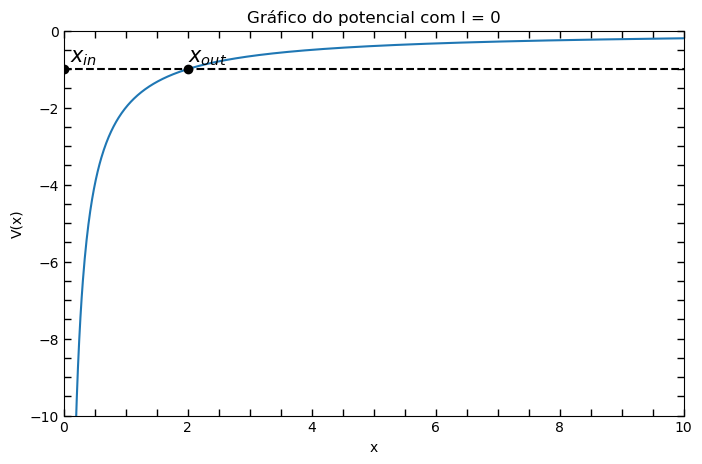

In [8]:
x = np.linspace(0.1, 10, 1000) #nosso eixo x
V = -2/x #potencial
eps = -1

plot_ticks()
plt.plot(x, V)

plt.xlim(0, 10)
plt.ylim(-10, 0) 

plt.plot(0, eps, 'o', color = 'black')
plt.text(0.1, eps+0.2, r"$x_{in}$", fontsize = 15)
plt.axhline(y = eps, xmin = 0, xmax = -2/eps, color = 'black', linestyle = '--')

plt.plot(-2/eps, eps, 'o', color = 'black')
plt.text(-2/eps, eps + 0.2, r"$x_{out}$", fontsize = 15)

plt.title("Gráfico do potencial com l = 0")
plt.ylabel("V(x)")
plt.xlabel("x")

$\quad$ Observe que o potencial diverge em posição próximas de zero. Assim, devemos ter cautela em definir o intervalo de integração, pois o $a$ não pode ser muito pequeno, se não o código poderá ter erros de overflows ou todas as autofunções encontradas não serão bem definidas, dificultando a aplicação do método. Vale ressaltar, que como o potencial tende a infinito quando $x = 0$, então podemos dizer que a partícula não consegue ir para posições de valores negativos. Em outras palavras, a partícula está confinada em um intervalo $[0, \infty]$. Outra coisa que deve ser salientada, é que quanto maior o valor da energia maior será o $x_{out}$, em $\epsilon = 0$ a partícula não está mais sobre a ação do potencial, ou seja, é uma partícula livre.

$\quad$ Contudo, após vários teste, vimos que o melhor intervalo a ser usado para o este problema é $[0.5, \ 60]$. Assim, devemos por $a = 0.5$ e $b=60$.

$\quad$ Dito isso, criaremos a seguir o código para obter as soluções do nosso problema.

In [ ]:
eps = -1 #valor incial para a energia
l = 0 #valor do l
a = 0.5 
b = 60
autovalor = [] #essa será uma lista para armazenar os autovalores encontrados
while eps<-0.01: #condição para que o código não encontre energias pequenas demais
    dpsi_l = 0 #valor inicial da derivada da solução pela esquerda
    dpsi_r = 1#valor inicial da derivada da solução pela direita
    while abs(dpsi_l-dpsi_r)>1e-5*(dpsi_r+dpsi_l)/2 and eps<0: #condição para verificar se precisão que queremos foi atingida
        psi_r, x_r= fpsi_r(b, eps, l) #determinando a solução pela direita
        psi_l, x_l = fpsi_l(a, eps, l) #determinando a solução pela esquerda
        psi_l = psi_l*psi_r[len(psi_r)-1]/psi_l[len(psi_l)-1] #reidefinindo a solução pela a esquerda

        #calculando as derivadas das soluções
        dpsi_r = df(eps, l, psi_r, x_r)
        dpsi_l = df(eps, l, psi_l, x_l)

        eps_old = eps #guardando o valor da energia
        eps += 0.005*abs((dpsi_l-dpsi_r)/(dpsi_r+dpsi_l)/2) #aumentando o valor da energia
        
        if abs(eps_old-eps)<1e-8: #verificando se o código está preciso em um autovalor
            eps+=0.05 #assim ele dará um passo maior
            
    if abs(len(autovalor)) == 0: 
            autovalor.append(eps) #guardando o autovalor determinado na lista
        
    if abs(autovalor[len(autovalor)-1]-eps) >1e-2: #verificando se os autovalores encontrados são muito próximos
        autovalor.append(eps) #guardando o autovalor determinado na lista

* **Observações:**

$\quad$ Note que o passo que se definirmos um passo tiver um tamanho constante, pode acontecer do código não encontrar o autovalor, pois, ele pode passar direto do valor que queremos, assim utilizamos um passo interativo. No qual é diretamente proporcional ao erro relativo das derivadas, 

$$ passo = 0.005 \left|\frac{\frac{d\psi^{\ l}(x_{match})}{dx} - \frac{d\psi^{\ r}(x_{match})}{dx}}{med} \right| \ ,$$

tal qual, o termo $med$ é a média entre $\frac{d\psi^{\ l}(x_{match})}{dx}$ e $\frac{d\psi^{\ r}(x_{match})}{dx}$, ou seja, $med = \frac{\frac{d\psi^{\ l}(x_{match})}{dx}+\frac{d\psi^{\ r}(x_{match})}{dx}}{2}$. Dessa forma, quanto mais próximos às derivadas forem, menor será o tamanho do passo, assim o valor da energia irá convergir até atingir a precisão que queremos. No entanto, surge um problema, que a energia não para de convergir, por conseguinte, ficava “presa” em um autovalor. A fim de impedir isso, colocamos um `if` para verificar se isso está acontecendo, caso esteja, o programa dá um passo maior de $0.05$.

$\quad$ Observe também que o erro que queremos atingir é diretamente proporcional à média das derivadas. Pomos assim, devido aos vários testes que foram feitos, vimos que as nossas autofunções não normalizadas tinham uma ordem muito alta, por exemplo, ordem de $10^{10}$. Dessa forma, as suas derivadas também tinham. Assim, a diferença das derivadas nunca chegava ao erro desejado, mesmo que esta fosse muito menor que as derivadas, sua ordem era muito alta. Dessa forma, multiplicando o erro que queríamos pelas médias dessas derivadas, conseguimos pôr a precisão comparável à diferença daquelas.

$\quad$ Daremos uma olhada nas autofunções encontratadas.

In [9]:
print(autovalor)

NameError: name 'autovalor' is not defined

$\quad$ Sabendo que os autovalores do problema do átomo de Hidrogênio é definido como $E_n = \frac{1}{2n^2}\ Ha$, isso em unidades Hartree. Com isso, sabemos quais são os autovalores exatos para o estado fundamental, primeiro, segundo e terceiro estado excitado, os quais são $-0.500$, $-0.125$, $-0.0556$ e $-0.0312$. Comparando os autovalores que encontramos com os exatos podemos excluir alguns que foram encontrados, os quais são resultados _outliers_, para isso usaremos o comando `delete` da biblioteca `Numpy`.

In [14]:
autovalor = np.delete(autovalor, [1, 2, 6])
autovalor

array([-0.4964745 , -0.15060256, -0.0441708 , -0.02987069])

$\quad$ A seguir, plotaremos as autofunções dos autovalores encontrados todas separadamente.

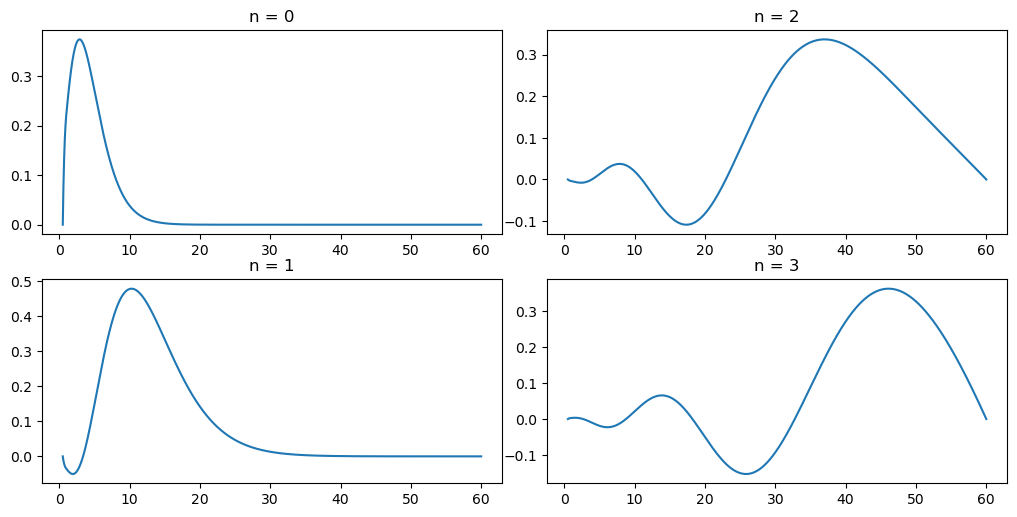

In [15]:
psi = np.zeros(2*len(psi_r)) #criando um array para a solução geral
x = np.zeros(2*len(psi_r)) #criando um array para x
N = len(autovalor) 
fig, ax = plt.subplots(int(N/2), int(N/2), figsize = (10, 5)) #criando uma figura com subplots

for i in range(N):
    psi_r, x_r = fpsi_r(b, autovalor[i], l)
    psi_l, x_l = fpsi_l(a, autovalor[i], l)
    psi_l = psi_l*psi_r[len(psi_r)-1]/psi_l[len(psi_l)-1]

    #armazenando a solução pela esquerda
    for j in range(len(psi_l)):
        psi[j] = psi_l[j]
        x[j] = x_l[j]

    #armazenando a solução pela direita
    for j in range(len(psi_r)):
        psi[len(psi_r)+j] = psi_r[len(psi_r) - 1 - j]
        x[len(psi_r)+j] = x_r[len(psi_r) - 1 - j]

    #normalizando a autofunção
    psi_n = psi_norm(psi, a, b)

    #plotando as autofunções
    if i < N/2:
        ax[i, 0].plot(x, psi_n)
        ax[i, 0].set_title("n = %.f"%i)
        fig.tight_layout(pad=0.1)
    else:
        ax[i-2, 1].plot(x, psi_n)
        ax[i-2, 1].set_title("n = %.f"%i)
        fig.tight_layout(pad=0.1)

$\quad$ Plotaremos todas juntas agora.

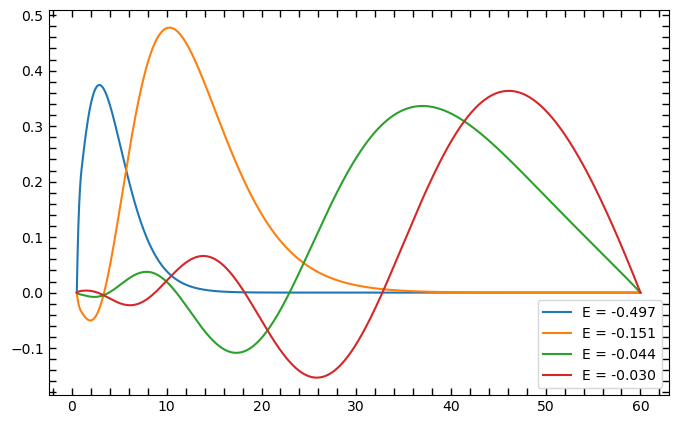

In [16]:
psi = np.zeros(2*len(psi_r)) #solução geral
x = np.zeros(2*len(psi_r))
N = len(autovalor)
plot_ticks()
for i in range(N):
    psi_r, x_r = fpsi_r(b, autovalor[i], l)
    psi_l, x_l = fpsi_l(a, autovalor[i], l)
    psi_l = psi_l*psi_r[len(psi_r)-1]/psi_l[len(psi_l)-1]
    
    for j in range(len(psi_l)):
        psi[j] = psi_l[j]
        x[j] = x_l[j]
    for j in range(len(psi_r)):
        psi[len(psi_r)+j] = psi_r[len(psi_r) - 1 - j]
        x[len(psi_r)+j] = x_r[len(psi_r) - 1 - j]
        
    psi_n = psi_norm(psi, a, b)

    plt.plot(x, psi_n, label = "E = %.3f" %autovalor[i])

plt.legend()

### 3.3 Determinando o erro do método

$\quad$ Para analisar o erro do método, utilizamos o erro relativo $err = \frac{|v_e - v_a|}{v_e}$, em que $v_e$ é o valor exato e $v_a$ é o valor aproximado. Logo, determinamos o erro comparando os autovalores que encontramos com os autovalores teóricos dos respectivos aUtoestados. Como pode ser visualizado na Tabela **1**.

|       | $E_a \ (Ha)$ | $E_e \ (Ha)$ | $err \ (\%)$ |
|-------|-------|-------|-------|
| $n=1$ | $-0.497$ | $-0.500$ | $0.600$ |
| $n=2$ | $-0.151$ | $-0.125$ | $20.8$ |
| $n=3$ | $-0.044$ | $-0.056$ | $21.4$ |
| $n=4$ | $-0.030$ | $-0.031$ | $3.33$ |

---

# Referências

**[1]** Caruso, Francisco, et al. “Applications of the Numerov Method to Simple Quantum Systems Using Python.” Revista Brasileira de Ensino de Física, vol. 44, no. e20220098, 2022, https://doi.org/10.1590/1806-9126-rbef-2022-0098. Accessed 29 Mar. 2024.

**[2]** Investigação da energia de ligação entre átomos utilizando o potencial de Lennard-Jones: https://github.com/PETfisicaUFRN/PET.py/blob/main/Notebooks/Investiga%C3%A7%C3%A3o%20da%20energia%20de%20liga%C3%A7%C3%A3o%20entre%20%C3%A1tomos%20utilizando%20o%20potencial%20de%20Lennard-Jones.ipynb

**[3]** Newman, Mark. Computacional Physics. 2012. University of Michigan, 2013.

**[4]** Giordano, N. J., & Nakanishi, H. (2006). Computational physics.